In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import matplotlib.ticker as mticker
from numpy import *
from matplotlib.pyplot import *
from iris.analysis import *
from iris.coord_categorisation import *
from iris.analysis.cartography import *
from scipy.stats import *
from scipy.stats.mstats import *
from iris import *

In [2]:
fname = '/Users/alicebrindley/Downloads/siconc_SImon_GFDL-CM4_ssp585_r1i1p1f1_gr_201501-210012.nc'
cube = iris.load(fname)
print(cube)

0: latitude / (degrees)                (latitude: 180; longitude: 360)
1: longitude / (degrees)               (latitude: 180; longitude: 360)
2: sea_ice_area_fraction / (%)         (time: 1032; latitude: 180; longitude: 360)


/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'siconc'
  warnings.warn(


In [3]:
siconc=cube[2]
print(siconc)

sea_ice_area_fraction / (%)         (time: 1032; latitude: 180; longitude: 360)
    Dimension coordinates:
        time                             x               -               -
        latitude                         -               x               -
        longitude                        -               -               x
    Cell methods:
        mean where sea              area
        mean                        time
    Attributes:
        Conventions                 CF-1.7 CMIP-6.0 UGRID-1.0
        activity_id                 ScenarioMIP
        branch_method               standard
        branch_time_in_child        0.0
        branch_time_in_parent       60225.0
        comment                     Model data on the 1x1 grid includes values in all cells for which any ocean...
        contact                     gfdl.climate.model.info@noaa.gov
        creation_date               2019-03-18T13:44:33Z
        data_specs_version          01.00.27
        experiment         

In [4]:
# three coords time, lat, lon
lat_long_data_from_1st_time_step = siconc[0,:,:]
lat_long_data_from_2nd_time_step = siconc[2,:,:]
time_long_data_from_1st_latitude_step = siconc[:,0,:]
time_lat_data_from_1st_litudeong_step = siconc[:,:,0]
siconc_at_time_zero = siconc[0,:,:]
print(siconc_at_time_zero)

sea_ice_area_fraction / (%)         (latitude: 180; longitude: 360)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Scalar coordinates:
        time                        2015-01-16 12:00:00, bound=(2015-01-01 00:00:00, 2015-02-01 00:00:00)
    Cell methods:
        mean where sea              area
        mean                        time
    Attributes:
        Conventions                 CF-1.7 CMIP-6.0 UGRID-1.0
        activity_id                 ScenarioMIP
        branch_method               standard
        branch_time_in_child        0.0
        branch_time_in_parent       60225.0
        comment                     Model data on the 1x1 grid includes values in all cells for which any ocean...
        contact                     gfdl.climate.model.info@noaa.gov
        creation_date               2019-03-18T13:44:33Z
        data_specs_version          01.00.27
        

In [5]:
#extract Jan and Dec to average the sea ice concentration across these months

add_month_number(siconc, 'time', name='month_number')
cube2 = siconc[np.where((siconc.coord('month_number').points == 12))]

#then to average this by each year, so that you have the December-Jan for each year add the 'season year', i.e. a number of each 'season'
add_season_year(cube2, 'time', name='season_year')

#then average by the season year:
cube2.aggregated_by(['season_year'], iris.analysis.MEAN)

<iris 'Cube' of sea_ice_area_fraction / (%) (time: 86; latitude: 180; longitude: 360)>

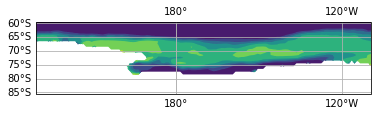

In [6]:
#identify the Ross Sea

cube3=cube2[0,:,:]

west = -230 
east = -110 
south = -85 
north = -60
temporary_cube = cube3.intersection(longitude = (west, east)) 
regional_cube = temporary_cube.intersection(latitude = (south, north))
ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0))) 
my_plot = iplt.contourf(regional_cube)
plt.gca().gridlines(draw_labels=True)


plt.show()

In [8]:
# most northerly row of cells and have a criteria like the average sea ice concentration in this 
# row is > 80% (might need some testing/iterating to find the right number).

#extract the latitude I want to work with:

north_edge = regional_cube.extract(iris.Constraint(latitude=-70))

#average across this latitude 
nE_mean = north_edge.collapsed('longitude', iris.analysis.MEAN)
print(nE_mean.data)

72.15791337568682


In [12]:
#define siconc for polynya
polynya_threshold=regional_cube.data

polynya = np.where((polynya_threshold.data <=30) & (nE_mean.data >=70))
print(polynya)

(array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13,
       13, 13, 13, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 2

In [ ]:
#create a loop for each year to run over each season year
year_start=2015
year_end=2100

#repeat over all years.
for season_cube in regional_year.slices(["season_year"]):
    
    if polynya_threshold <= 30 and north_edge_mean >= 70:
        plt.subplot
    else:
        print('no polynya')

In [ ]:
#calculate the area of the ouput (polynya)
#result being the output from previous cell which doesn't run

result.coord('grid_latitude').guess_bounds()
result.coord('grid_longitude').guess_bounds()
grid_areas = iris.analysis.cartography.area_weights(cube)

cube_vf = result.collapsed(['grid_longitude', 'grid_latitude'], iris.analysis.MEAN, weights=grid_areas)

In [ ]:
#if statement to define siconc of 30% surrounded by siconc of 70+%
if polynya_threshold <= 30 and north_edge_mean >= 70:
    qplt.pcoloresh
    
    polynya = np.where(polynya_threshold <=30)
plt.show

